In [1]:
from astropy.table import Table
from slsim.Sources.source import Source
from astropy.cosmology import FlatLambdaCDM
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)

In [3]:
source_dict_bpl_agn = Table(
    [
        [1.5],
        [4],
        [0.35],
        [0.8],
        [0.76],
        [20],
        [[np.linspace(1, 500, 500)]],
        [1000],
        [10],
        [500],
        [10],
        [8.5],
        [40],
    ],
    names=(
        "z",
        "n_sersic",
        "angular_size",
        "e1",
        "e2",
        "ps_mag_i",
        "MJD",
        "r_out",
        "corona_height",
        "r_resolution",
        "inclination_angle",
        "black_hole_mass_exponent",
        "random_seed",
    ),
)

In [4]:
variable_agn_kwarg_dict = {
    "length_of_light_curve": 3000,
    "time_resolution": 1,
    "log_breakpoint_frequency": 1,
    "low_frequency_slope": 1,
    "high_frequency_slope": 3,
    "normal_magnitude_variance": 1,
}

In [5]:
source_bpl_agn = Source(
    source_dict_bpl_agn,
    variability_model="light_curve",
    kwargs_variability={"agn_lightcurve", "g", "i", "z"},
    lightcurve_time=np.linspace(0, 500, 200),
    cosmo=cosmo,
    agn_driving_variability_model="bending_power_law",
    agn_driving_kwargs_variability=variable_agn_kwarg_dict,
)

In [6]:
light_curves = source_bpl_agn.kwargs_variability_extracted

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/astropy/units/quantity.py:666: RuntimeWarning: invalid value encountered in power
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/astropy/units/quantity.py:666: RuntimeWarning: overflow encountered in power
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/astropy/units/quantity.py:666: RuntimeWarning: divide by zero encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/astropy/units/quantity.py:666: RuntimeWarning: invalid value encountered in multiply
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


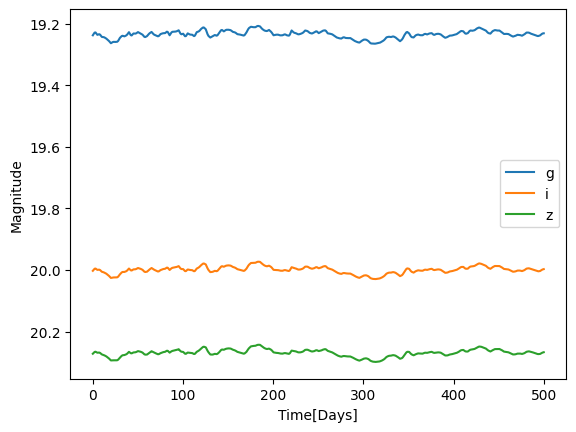

In [7]:
plt.plot(
    light_curves["g"]["MJD"],
    light_curves["g"]["ps_mag_g"],
    label="g",
)
plt.plot(
    light_curves["i"]["MJD"],
    light_curves["i"]["ps_mag_i"],
    label="i",
)
plt.plot(
    light_curves["z"]["MJD"],
    light_curves["z"]["ps_mag_z"],
    label="z",
)


plt.legend()

# plt.ylim(18, 22)
# plt.xlim(100, 200)
plt.gca().invert_yaxis()
plt.ylabel("Magnitude")
plt.xlabel("Time" "[Days]")
plt.show()

In [8]:
source_bpl_agn.source_dict

z,n_sersic,angular_size,e1,e2,ps_mag_i,MJD,r_out,corona_height,r_resolution,inclination_angle,black_hole_mass_exponent,random_seed
float64,int64,float64,float64,float64,int64,"float64[1,500]",int64,int64,int64,int64,float64,int64
1.5,4,0.35,0.8,0.76,20,1.0 .. 500.0,1000,10,500,10,8.5,40


In [9]:
print(np.mean(light_curves["g"]["ps_mag_g"]))
print(np.mean(light_curves["i"]["ps_mag_i"]))
print(np.mean(light_curves["z"]["ps_mag_z"]))

print(np.std(light_curves["g"]["ps_mag_g"]))
print(np.std(light_curves["i"]["ps_mag_i"]))
print(np.std(light_curves["z"]["ps_mag_z"]))

19.235244976682832
20.0
20.26929308533779
0.011583338994040829
0.01125213274308001
0.011088962452526788


In [10]:
# allow for random bpl to be generated
if "random_seed" in source_dict_bpl_agn.keys():
    del source_dict_bpl_agn["random_seed"]
new_source = Source(
    source_dict_bpl_agn,
    variability_model="light_curve",
    kwargs_variability={"agn_lightcurve", "g", "r", "i", "z"},
    lightcurve_time=np.linspace(0, 1000, 500),
    cosmo=cosmo,
)
new_light_curves = new_source.kwargs_variability_extracted

mean +/- dev g : 18.95 +/- 0.27
mean +/- dev r : 19.54 +/- 0.26
mean +/- dev i : 20.0 +/- 0.26
mean +/- dev z : 20.33 +/- 0.25


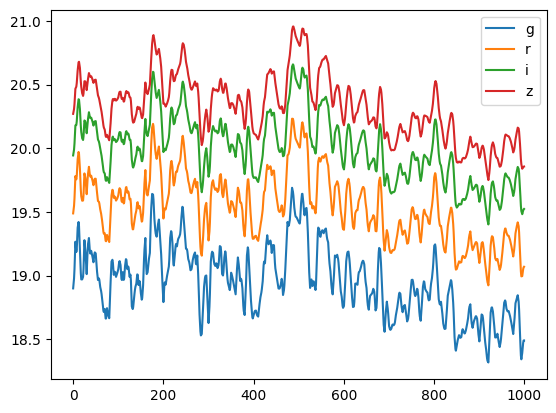

In [11]:
for key in new_light_curves.keys():
    plt.plot(
        new_light_curves[key]["MJD"],
        new_light_curves[key]["ps_mag_" + str(key)],
        label=key,
    )
    print(
        "mean +/- dev",
        key,
        ":",
        round(np.mean(new_light_curves[key]["ps_mag_" + str(key)]), 2),
        "+/-",
        round(np.std(new_light_curves[key]["ps_mag_" + str(key)]), 2),
    )
plt.legend()
plt.show()

In [12]:
new_source.source_dict

z,n_sersic,angular_size,e1,e2,ps_mag_i,MJD,r_out,corona_height,r_resolution,inclination_angle,black_hole_mass_exponent
float64,int64,float64,float64,float64,int64,"float64[1,500]",int64,int64,int64,int64,float64
1.5,4,0.35,0.8,0.76,20,1.0 .. 500.0,1000,10,500,10,8.5
